# This Is My 29. Age Group Classification from Faces

# Import Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
%matplotlib inline

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Importing Necessary libraries
import splitfolders
import os
import tensorflow
import keras
import random
import itertools

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras.utils import plot_model, to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.preprocessing import image
from PIL import Image


# convert to encoding
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau

print(os.listdir("C:/Users/ADMIN/Downloads/train.csv1"))


['sample_submission.csv', 'test.csv', 'train.csv']


# Read train 

In [2]:
train = pd.read_csv("Train.csv")
print(train.shape)
train.head(2)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Read test 

In [3]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head(2)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Drop 'label' column

In [4]:
X_train = train.drop(labels = ["label"],axis = 1) 

# put labels into y_train variable

In [5]:
Y_train = train["label"]

Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

# plot some samples

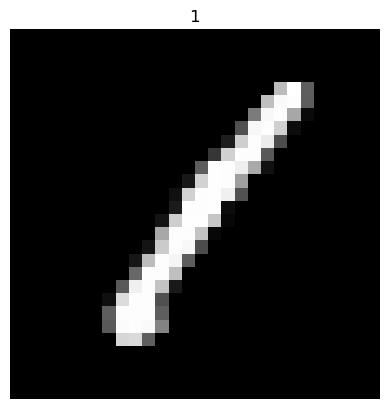

In [6]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

# plot some samples

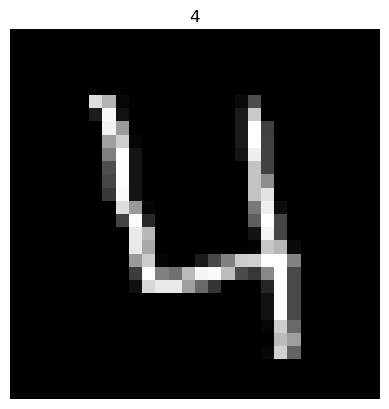

In [7]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

# Normalize the data

In [8]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


# Reshape

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


# Encoding 

In [10]:
Y_train = to_categorical(Y_train, num_classes = 10)

# Split the train and the validation set for the fitting

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


# Some examples

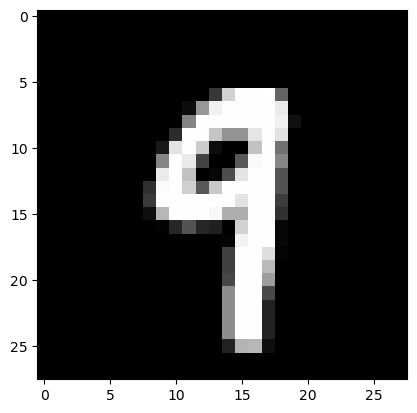

In [12]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [13]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer

In [14]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model

In [15]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 250

# Data Augmentation

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fit the model

In [17]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 58s 336ms/step - accuracy: 0.4824 - loss: 1.5140 - val_accuracy: 0.9471 - val_loss: 0.1827
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8720 - loss: 0.4351 - val_accuracy: 0.9476 - val_loss: 0.1817
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 329ms/step - accuracy: 0.8550 - loss: 0.4529 - val_accuracy: 0.9583 - val_loss: 0.1251
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8920 - loss: 0.3601 - val_accuracy: 0.9581 - val_loss: 0.1253
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 323ms/step - accuracy: 0.9014 - loss: 0.3098 - val_accuracy: 0.9690 - val_loss: 0.1018
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9160 - loss: 0.2704 - val_accuracy: 0.9688 - val_loss: 0.1022
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 48s 320ms/step - accuracy: 0.9189 - loss: 0.2679 - val_accuracy: 0.9726 - val_loss: 0.0869
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9200 - loss: 0.2715 - val

# Plot the loss and accuracy curves for training and validation 

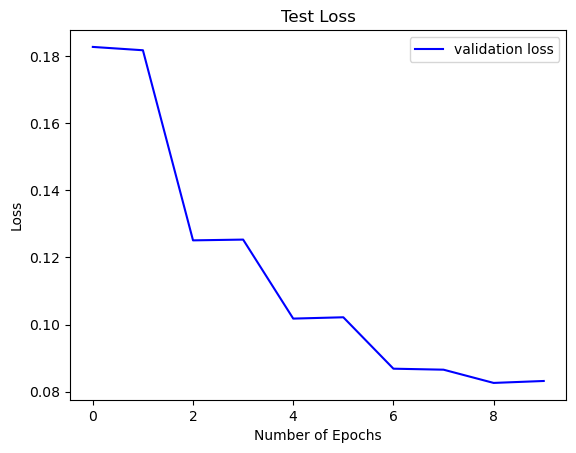

In [18]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Confusion matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


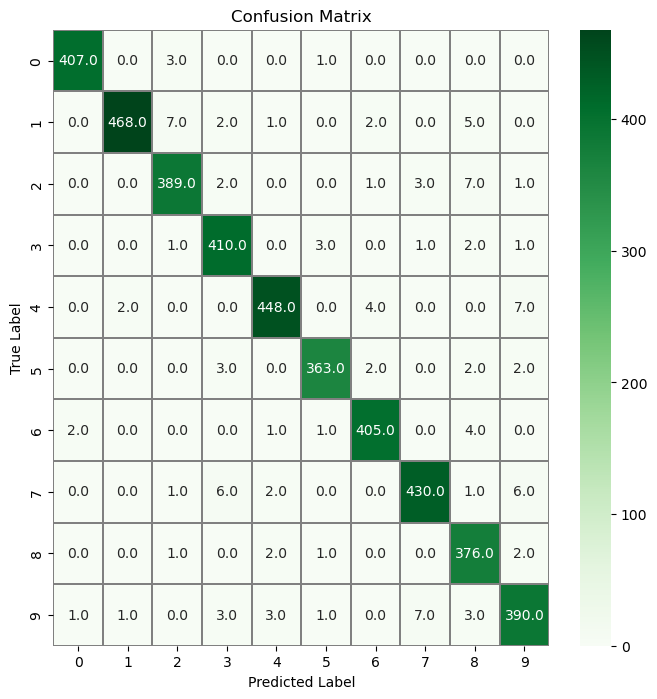

In [19]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# If you have any suggestions, please DM me.
# Even a small message from you can make a big impact on my career
#### I am Arun